# <!-- TITLE --> __```Exploration des données + Data Viz```__
<img width="1000px" height="400px" src="images/out.png"></img>

####  __```Importations des modules Python```__

In [1]:
%matplotlib inline 

In [45]:
import random
import pandas as pd  
import numpy  as np 
import seaborn as sns 
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder


#### __```Importations des modules Python externes```__

In [56]:
from modules_python.file_extraction.extraction import read_plant_datasets
from modules_python.config.cmap import color_map as cmap
from modules_python.config.plot_images import plot as plot_img
from modules_python.image_processing.SemanticImage import SemanticImage
from modules_python.plots.plot import hist_hist_plot, hist_bar_plot, hist_pie_plot, boxplot
from modules_python.image_processing.preprocessing import  filter_selection
from modules_python.image_processing.data_aug import data_augmenter_v1 as data_aug
from modules_python.image_processing.ImageSeg import ImageSegmentation
from modules_python.image_processing.tools import change_bg

#### __```Liste des Couleurs disponibles```__

In [4]:
# liste de couleurs
python_colors = list(mcolors.CSS4_COLORS.keys())

#### __```Liste des Couleurs de mappage```__

In [5]:
# Mappage des couleurs
python_colors_map = cmap().get_cmap_list()

#### __```Définir le chemin d'accès du dataset```__

In [6]:
# Mettre son chemin ici, différent pour tout le monde (Iréné)
PATH = "C:\\Users\\amib\Documents\\Py_Projects\\DS_project\\especes"

#### __```Extraction & Lecture des données```__

- Plus de détails sur les différents paramètres [ici](https://github.com/amiehe-essomba/Plant_Seedlings_ds_Project/blob/Plant_Seedlings/details.md)
- Source des données : [Kaggle V2 Plant Seedlings Dataset](https://www.kaggle.com/datasets/vbookshelf/v2-plant-seedlings-dataset)

In [ ]:
# nombres d'espèces de plantes
samples         = 12

# pas
pas             = 1

# extraction de tout le dataset (samples = 12 et pas = 1)
type_indexes    = [x for x in range(0, samples, pas) ]

# type de filtre utilisé
channel_type    = "RGR2-LAB"

# fenêtres de redimensionnement 
reshape         = [(160, 160)]

# format de données
return_as       = "dict"

# verbose
verbose         = 1

# ajout de l'intensité lumineuse sur les 3 canaux
add_contrast    = True 

# début de l'extraction des fichiers
DATA            = read_plant_datasets(
                        path        = PATH, 
                        reshape     = reshape, 
                        return_as   = return_as, 
                        verbose     = verbose, 
                        type_indexes= type_indexes, 
                        channel_type= channel_type,
                        add_contrast= add_contrast
                        )

#### __```Chargement des données```__

In [8]:
# selection de la taille des image
shape           = reshape[0]

# extraction & chargement (EL)
data            = DATA[f"{shape[0]}x{shape[1]}"].copy()

In [9]:
# definir la légende (noms des plantes)
legend          = data['feature_names']

# définir les coleurs pour chaque plantes du dataset
colors          = ["blue", 'orange', 'darkgreen', 'darkred', 'm', "c", "lime", "k", "y", "violet", "gold", "darkblue" ]
# le choix des couleurs peut également de faire comme suite 
#colors = random.sample(python_colors, samples) 

#### __```Visualisation des différentes espèces de plantes en RBG et sous Infra-Rouge```__

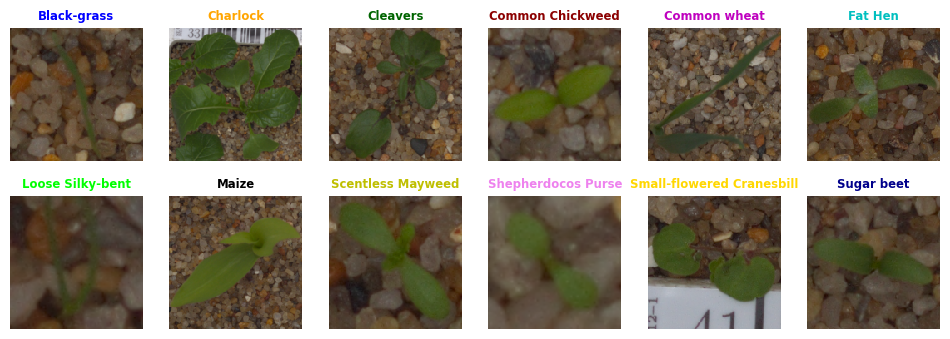

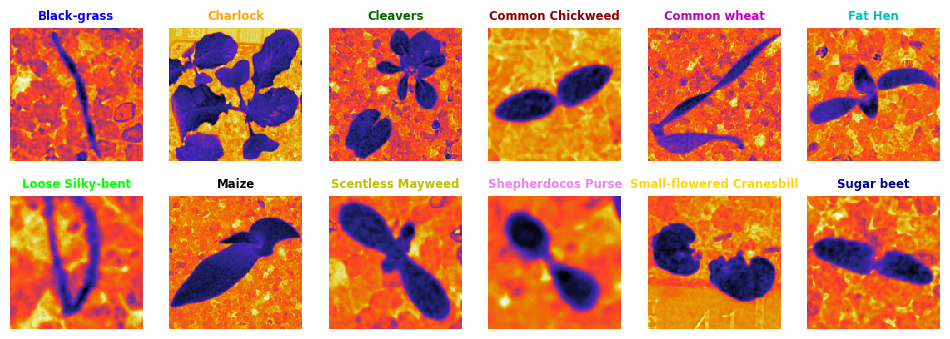

In [10]:
"""
Section de visualisation sur le canal 1.
à Savoir que, pour une bonne représentation des coleurs toutes les images ont 3 canaux (RGB2-LAB)
"""

# choisir l'unique valeur pour toutes les plantes (image uinique)
index           = 10

for s in ['images', 'X']:
    # choisir le canal de couleur (axis=1)
    channel         = 1

    # types d'images {X : RGR2-LAB, images : images réelles}
    type_img        = s

    # indice de la couleur de mappage (2D)
    id_cmap         = 10
    
    # visualisation des images dans l'infra-rouge
    plot_img(
        data        = data,                         # both
        index       = index,                        # both
        channel     = channel,                      # both 
        colors      = colors,                       # both (title's colors)
        legend      = legend,                       # both 
        type_img    = type_img,                     # both 
        cmap        = python_colors_map[id_cmap],   # fig bottom (RGR2-LAB)
        save        = True,                         # fig bottom (RGR2-LAB)
        fig_name    =  "rgb.png"                    # fig top (RGB)
        )


#### __```Analyses des Images```__
- *[Intialisation des paramètres]()*

In [11]:
# Indices associés à chaque espèces de plantes
id_sel      = [1, 3, 5, 7, 9, 11] # [0, 2, 4, 6, 8, 10]#
# Sous legendes
sub_lengend = [legend[q] for q in id_sel]
# Sous coleurs 
# random.sample(python_colors, k=len(id_sel))
sub_colors  = ["darkblue", 'darkorange', 'green', 'red', 'm', 'skyblue']


- *[Hauteur & Largeur (n_H x n_L)]()*

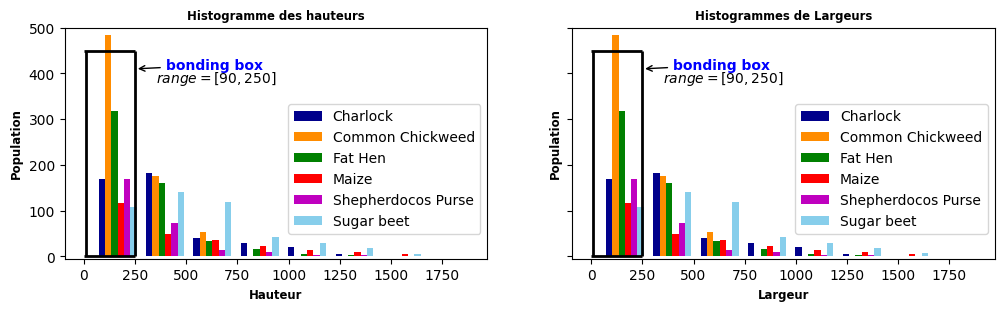

In [12]:

# Hauteurs (n_H)
Hauteus     = [data['height'][i] for i in id_sel]
# Largeurs (n_L)
Largeurs    = [data['width'][i] for i in id_sel] 
# Concatenation
X           = [Hauteus, Largeurs]
# titles 
titles      = ["Histogramme des hauteurs", "Histogrammes de Largeurs"]
# xlabels 
xlabel      = ['Hauteur', "Largeur"]
# ylabels 
ylabel      = ["Population", "Population"]
# figsize   
figsize     = (12, 3)
# bonding box coordinates 
coord   : dict = {"x" : [[10, 250], [10, 250]], 
                        "y" : [[0, 450], [0, 450]], "xmin":[0, 0], "ymin":[0, 0],
                        "xmax" : [250, 250], "ymax" :  [450, 450]}

hist_hist_plot(
    X           = X,                # both 
    legend      = sub_lengend,      # both 
    title       = titles,           # both 
    xlabel      = xlabel,           # both 
    ylabel      = ylabel,           # both 
    colors      = sub_colors,       # both
    figsize     = figsize,          # both 
    bonding_box = True,             # both 
    annot       = True,             # both 
    text        = True,             # both
    coord       = coord,            # both
    y_lim       = [-5, 500],        # both 
    bins        = 8,                # both
    save        = False
    )

- *[Pixellisations & Répartition d'espèces]()*

| __Noms d'espèces__                    | __Nombre de plantes par espèce__ | __RGBA (RGB + canal alpha)__  |__[Total]()__|
|---------------------------------------|----------------------------------|-----------------------------|------|
| __Black-grass__                       | __309__               | __3__|
| __Charlock__                          | __452__               | __0__|
| __Cleavers__                          | __335__               | __0__|
| __Common Chickweed__                  | __713__               | __0__|
| __Common wheat__                      | __253__               | __0__|
| __Fat Hen__                           | __538__               | __0__|
| __Loose Silky-bent__                  | __762__               | __21__|
| __Maize__                             | __257__               | __0__|
| __Scentless Mayweed__                 | __607__               | __0__|
| __Shepherdoco Purse__                 | __274__               | __0__|
| __Small-flowered Cranesbill__         | __576__               | __0__|
| __Sugar beet__                        | __463__               | __0__|
|  __[Total]()__                        | __[5539]()__                     | __[24]()__      |__[12 espèces]()__|

- Valeurs Statistiques

|__Min__        | __Max__     | __Mean__         | __Med__        | __std__       | __Q1__         | __Q3__       | __IQ__        |
|---------------|-------------|------------------|----------------|---------------|----------------|--------------|---------------|
|  __[253]()__  | __[762]()__ | __[462.6]()__    | __[457.5]()__  | __[179.3]()__ | __[300.3]()__  |__[583.8]()__ | __[283.5]()__ |



* Voir [Boxplot](#boxplot)  bellow



- [Boxplot](#boxplot)

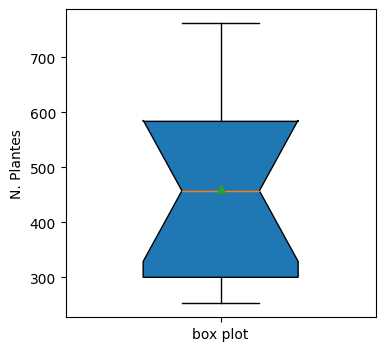

In [13]:
num   = pd.Series(data = data['number_of_images'], name='spaces') 
boxplot(X=num, save=False)

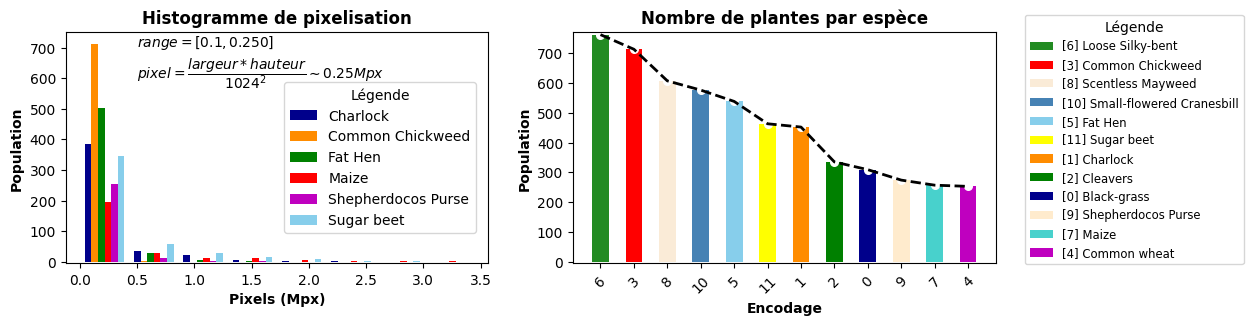

In [14]:
# création d'une Series pour stocker le nombre d'images par espèves
num_of_images   = pd.Series(data = [data['number_of_images'][q] for q in id_sel ], name='spaces').values
# gama
gama            = pd.Series(data = data['number_of_images'], name='spaces').values
# pixels
Pixels          = [data['pixels'][q] for q in id_sel]
# titles 
titles          = ["Histogramme de pixelisation", "Nombre de plantes par espèce"]
# xlabels 
xlabel          = ["Pixels (Mpx)", "Encodage"]
# ylabels 
ylabel          = ["Population", "Population"]
# Concatenation
X               = [Pixels, num_of_images]

hist_bar_plot(
    X           = X,                        # both
    figsize     = figsize,                  # both
    colors      = sub_colors,               # both
    legend      = sub_lengend,              # both
    xlabel      = xlabel,                   # fig 1 
    ylabel      = ylabel,                   # fig 1
    titles      = titles,                   # fig 1
    rot         = 45,                       # fig 2
    bb_box      = {"x" : 0.5, "y" : 600},   # fig 1
    legends     = legend,                   # fig 2
    y_lim       = [[-5, 750], [-5, 770]] ,  # both
    encoding    = True,                     # fig 2
    sort        = True,                     # fig 2
    rev         = True,                     # fig 2
    bar_bbox    = (1.1, 0.6, 0.5, 0.5),     # fig 2
    gama        = gama,                     # fig 2
    c           = 'k',                      # fig 2
    bins        = 8,                        # fig 1
    width       = 0.5,                      # fig 2
    save        = False
    )

- *[Longueur/Hauteur & Canaux RGBA(GRB + canal alpha)]()*

In [15]:
def x_y(widths, heights, size : int = 3):
    # cacul du rapport width / height 
    return [np.array(widths[i]) / np.array(heights[i]) for i in range(size)]

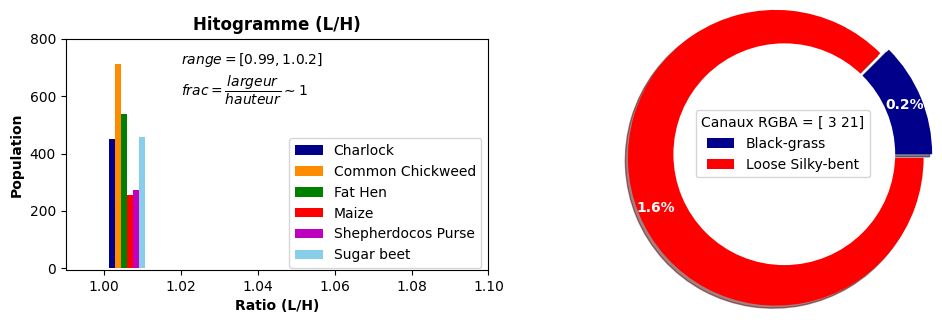

In [16]:
bb_box              = {"x":1.02, "y":600}
# création d'une Series pour stocker le nombre d'images par espèves
X_Y                 = x_y(heights=Hauteus, widths=Largeurs, size=len(sub_lengend))
# pixels
Sobels              = [data['sobels'][q] for q in [0, 1, 3, 6, 9, 11]]
# Sobel_legends 
Sobel_legends       = [legend[q] for q in [0, 1, 3, 6, 9, 11]]
# Concatenation
X                   = [X_Y, Sobels]

if      sum(Sobels) == 0: figsize_=(6, 3)
else:   figsize_    = (12, 3)

hist_pie_plot(
    X               = X,                    # both
    legend          = sub_lengend,          # fig 1
    colors          = sub_colors,           # both
    bb_box          = bb_box,               # fig 1
    figsize         = figsize_,             # fig 1
    vline           = True,                 # fig 1 (show vertical line)
    xlabel          = ['Ratio (L/H)', ""],  # fig 1
    ylabel          = ['Population', ""],   # fig 1
    y_lim           = [-5, 800],            # fig 1
    x_lim           = [0.99, 1.1],          # fig 1
    Sobel_legends   = Sobel_legends,        # fig 2
    radius          = 1.2,                  # fig 2 (circle radius)
    explode_id      = [1],                  # fig 2 
    titles          = ['Hitogramme (L/H)'], # fig 1
    v_line          = False,                # fig 1
    save            = False
)

- *[Histogrammes de couleurs en RGR2-LAB( 3 canaux )]()*

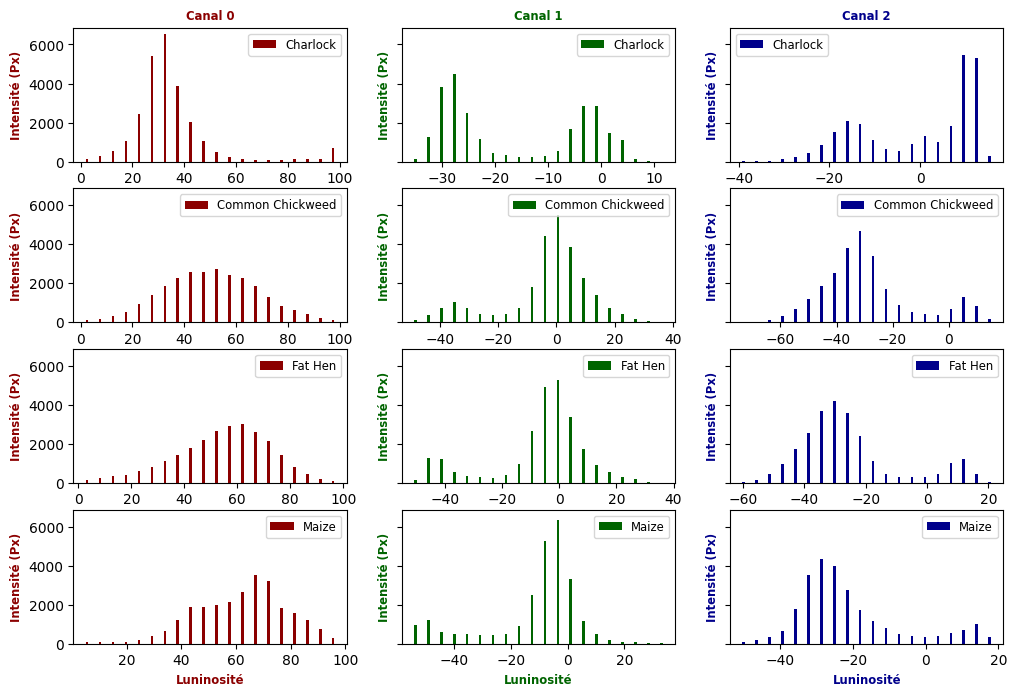

In [17]:
# Selection d'images RGR2-LAB
images  =  [data['X'][m][index].astype("float32").copy() for m in id_sel]

# Visualisations graphiques des histogrammes de couleurs sur les 3 axes [0, 1, 2]  
filter_selection(
    img             = images, 
    names           = sub_lengend,  
    select_index    = [0, 2, 5, 4], 
    figsize         = (12,8), 
    bins            = 20
    )
plt.show()

#### __```Segmentation d'Images Sémantqiues(SIS) Différentes étapes```__
Comment effectuer la [Segmentation d'Images Sémantiques]()
* [REF. 1](https://fr.wikipedia.org/wiki/Segmentation_d%27image)
* [REF. 2](https://nanonets.com/blog/semantic-image-segmentation-2020/)
* [REF. 3](https://towardsdatascience.com/semantic-segmentation-popular-architectures-dff0a75f39d0)

In [18]:
# seuils de valeurs RGB de l'arrère plan(background) voir ( l'histogramme de couleurs du canal 1 )
threshold   = [-300, -25]

# seuils max du noir sur une échelle de [0, 255] pour les 3 canaux
upper_color = [30, 30, 30]

# seuils min du noir sur une échelle de [0, 255] pour les 3 canaux
lower_color = [0, 0, 0]

# rayon utilisé pour la dilatation et l'érosion
radius      = 3.8

# méthode de segmentation  utilisée
method      = "where"
# visualisation des images dans l'infra-rouge

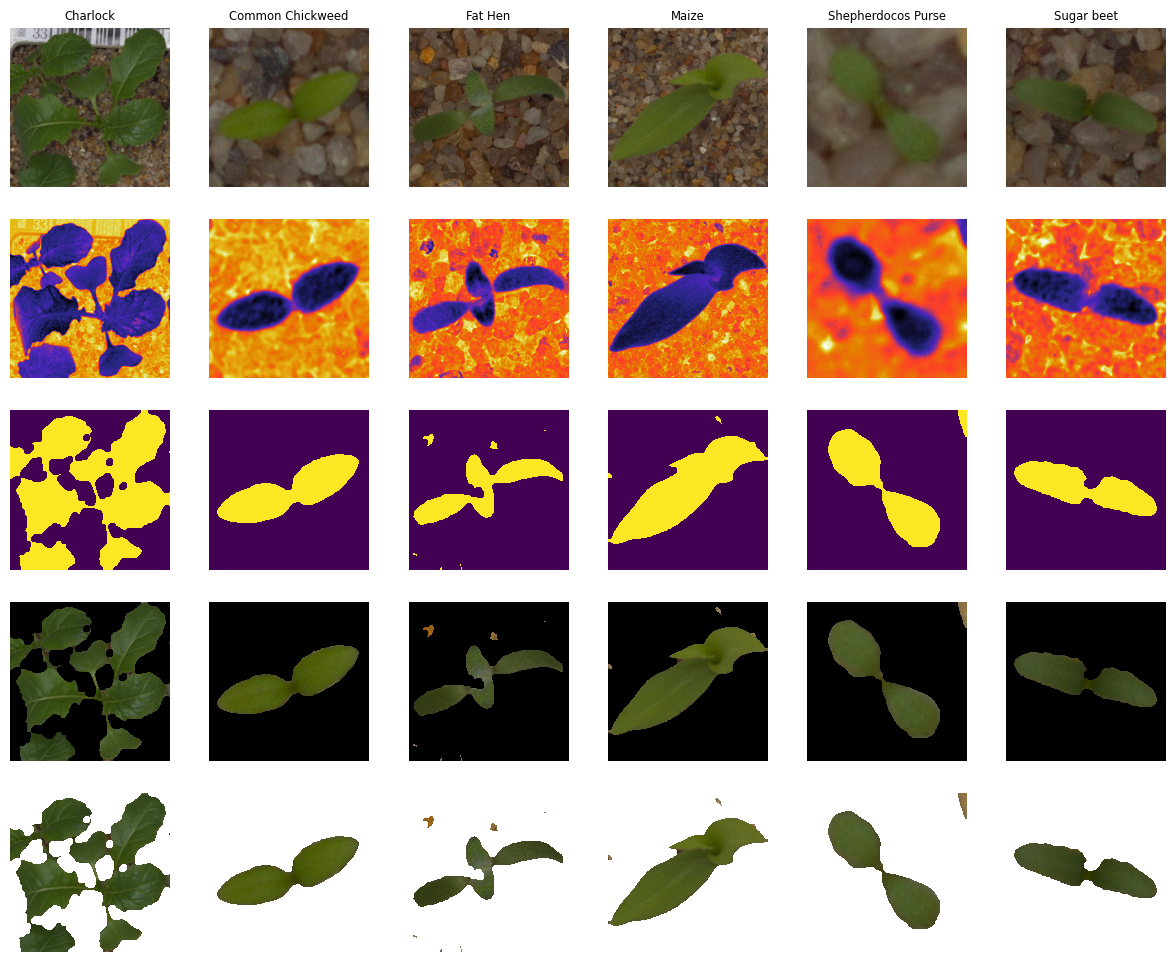

In [69]:
cmap = python_colors_map[id_cmap]
bg='all'
SemanticImage(
        data        = data,
        index       = index,
        channel     = channel,
        threshold   = threshold,
        upper_color = upper_color,
        lower_color = lower_color,
        legend      = legend,
        radius      = radius,
        method      = method,
        bg          = bg,
        id_sel      = id_sel, 
        deep_mask   = True,
        kernel      = (1, 1),
        cmap=cmap,
        figsize=(15, 12)
    )

In [65]:
feature_index   = 1
_image_seg_     = ImageSegmentation(
        img=data['X'][feature_index][index].astype(np.float32).copy(),
        src=data['images'][feature_index][index].astype(np.float32).copy(),
        threshold=threshold, 
        radius=radius,
        shape=shape,
        axis=channel,
        dil_and_err=True,
        method=method
    )


In [66]:
Data_aug = data_aug()

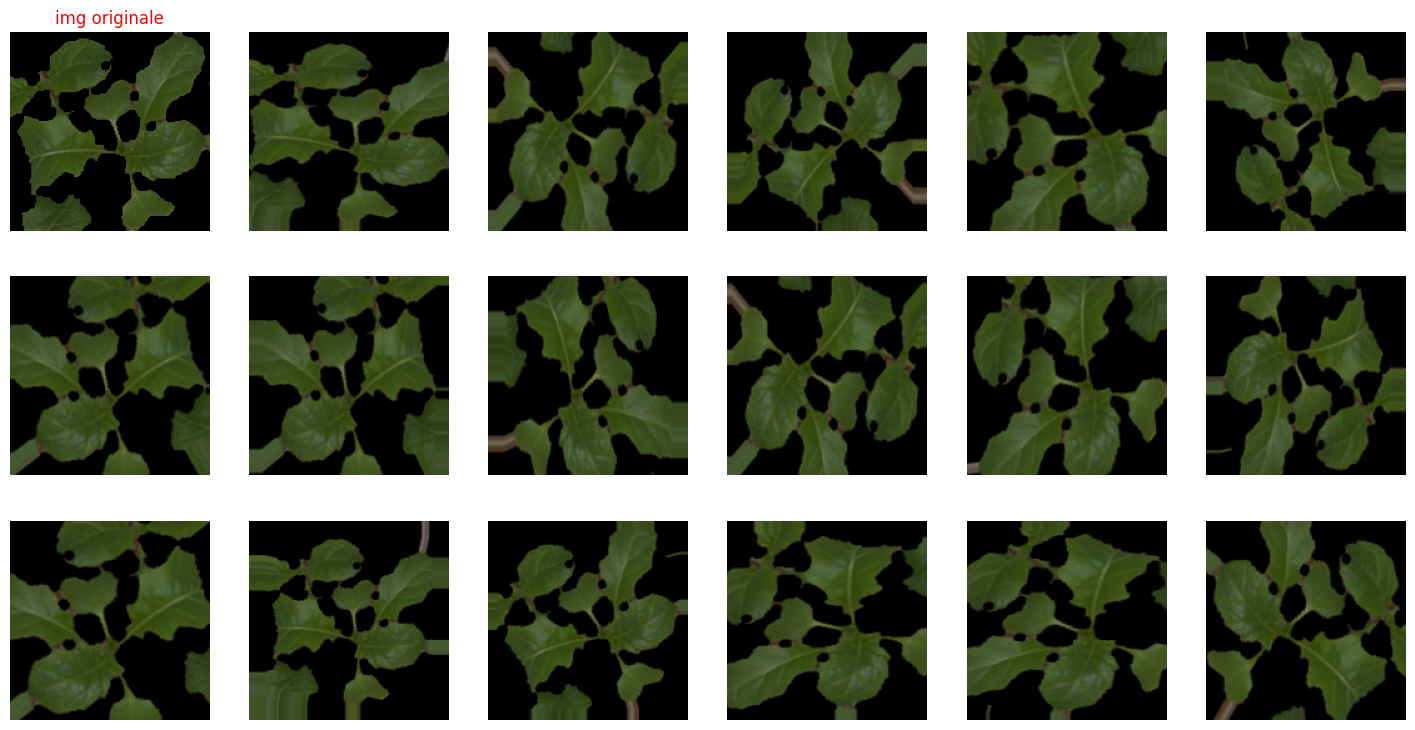

In [67]:


plt.figure(figsize=(18, 9))
for i in range(18):
    for j in range(1):
        plt.subplot(3, 6, i+j+1)
        if i != 0 : 
            XX_ = Data_aug(_image_seg_)
            XX_ = XX_.numpy().reshape((1, shape[0], shape[1], 3))
        else : 
            XX_ = tf.expand_dims(_image_seg_, 0) 
            plt.title("img originale", color="red")
        
        plt.axis("off")
        plt.imshow(XX_[0]) 

plt.savefig("./images/img_aug.png")